In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import argparse
import os

def plot(data_dir, mean_only=False):
    # Get all files in data_dir
    files = [f for f in os.listdir(data_dir) if os.path.isfile(os.path.join(data_dir, f))]
    # We assume the following data_dir:
    # ../../../ENV_NAME/VAL_NAME/*.csv
    # For example: tf-data/Pong-DQN/average-q/*.csv
    path = os.path.normpath(data_dir)
    head, val_name = os.path.split(path)
    _, env_name = os.path.split(head)

    # Create one big dataframe
    df = pd.DataFrame()
    row_sizes = []
    for i, f in enumerate(files):
        if 'scalars' in f:
            f_path = os.path.join(data_dir, f)
            data = pd.read_csv(f_path)
            if 'step' not in df.columns:
                df.loc[:, 'step'] = data.loc[:, 'Step']
            colname = 'run' + str(i)
            df.loc[:, colname] = data.loc[:, 'Value']
            run_length = len(data['Value'])
            row_sizes.append(run_length)

    # Compute mean and std, ommit 'step' column
    df1 = df.drop(['step'], axis=1)
    df.loc[:, 'mean'] = df1.mean(axis=1)
    df.loc[:, 'std'] = df1.std(axis=1)

    # Create the plot
    fig, ax = plt.subplots()
    for column in df:
        if 'run' in column:
            col_data = np.array(df.loc[:, column])
            if not mean_only:
                ax.plot(df.loc[:, 'step'], col_data, 'b--', alpha=0.3, label=None)
    rolling_mean = df.loc[:, 'mean'].rolling(window=10, center=True).mean()
    ax.errorbar(df.loc[:, 'step'], rolling_mean, yerr=df.loc[:, 'std'], fmt='b', errorevery=10, label=val_name)
    ax.legend(loc='best')
    ax.set_xlabel('steps')
    ax.set_ylabel(val_name)
    # ax.set_title('Average score per episode')
    ax.grid(linestyle='--', linewidth=1, alpha=0.1)
    # plt.show()

    fig.savefig(env_name + '-' + val_name + '.pdf')

if __name__ == '__main__':
    parser = argparse.ArgumentParser(description='Plot tensorboard csv data.')
    parser.add_argument('dir', type=str, help='The directory that contains the CSV files')
    parser.add_argument('-m', '--meanonly', action='store_true', help='Bool to indicate to plot the mean only')
    args = parser.parse_args()
    plot(args.dir, mean_only=args.meanonly)

run_1.csv
run_2.csv
run_3.csv
run_4.csv
run_5.csv


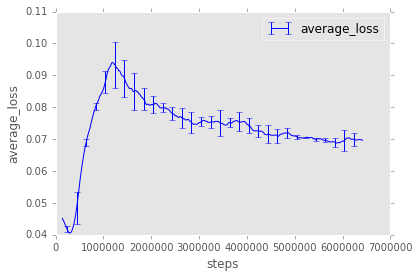

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
%matplotlib inline
plt.style.use('ggplot')
def plot(data_dir, mean_only=False):
    # Get all files in data_dir
    files = [f for f in os.listdir(data_dir) if os.path.isfile(os.path.join(data_dir, f))]
    path = os.path.normpath(data_dir)
    head, val_name = os.path.split(path)
    _, env_name = os.path.split(head)
    
    # Create one big dataframe
    df = pd.DataFrame()
    row_sizes = []
    for i, f in enumerate(files):
        if 'run' in f:
            print(f)
            f_path = os.path.join(data_dir, f)
            data = pd.read_csv(f_path)
            if 'step' not in df.columns:
                df.loc[:, 'step'] = data.loc[:, 'Step']
            colname = 'run' + str(i)
            df.loc[:, colname] = data.loc[:, 'Value']
            run_length = len(data['Value'])
            row_sizes.append(run_length)
        

    # Compute mean and std, ommit 'step' column
    df1 = df.drop(['step'], axis=1)
    df.loc[:, 'mean'] = df1.mean(axis=1)
    df.loc[:, 'std'] = df1.std(axis=1)
    
#     print(df)

    # Create the plot
    fig, ax = plt.subplots()
    for column in df:
        if 'run' in column:
            col_data = np.array(df.loc[:, column])
            if not mean_only:
                ax.plot(df.loc[:, 'step'], col_data, 'b--', alpha=0.3, label=None)
    
    rolling_mean = df.loc[:, 'mean'].rolling(window=10, center=True).mean()
    ax.errorbar(df.loc[:, 'step'], rolling_mean, yerr=df.loc[:, 'std'], fmt='b', errorevery=10, label=val_name)
    ax.legend(loc='best')
    ax.set_xlabel('steps')
    ax.set_ylabel(val_name)
    # ax.set_title('Average score per episode')
    ax.grid(linestyle='--', linewidth=1, alpha=0.1)
    plt.show()

    fig.savefig(os.path.join(data_dir,env_name + '-' + val_name + '.pdf'))
# plot("/Users/yannickmerckx/Desktop/results/Boxing/Vanilla/average_loss",True)

run_1.csv
run_2.csv
run_3.csv
run_4.csv
run_5.csv


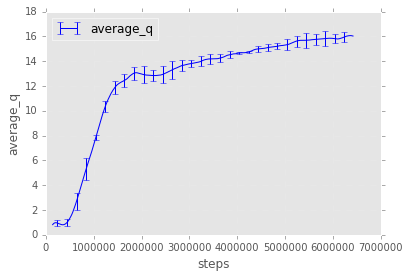

run_1.csv
run_2.csv
run_3.csv
run_4.csv
run_5.csv


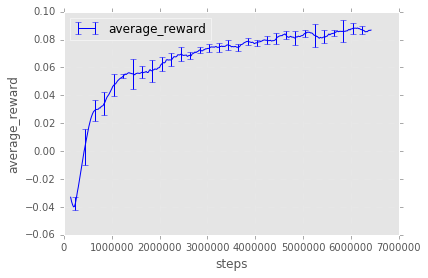

run_1.csv
run_2.csv
run_3.csv
run_4.csv
run_5.csv


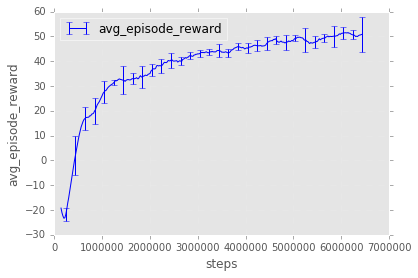

run_1.csv
run_2.csv
run_3.csv
run_4.csv
run_5.csv


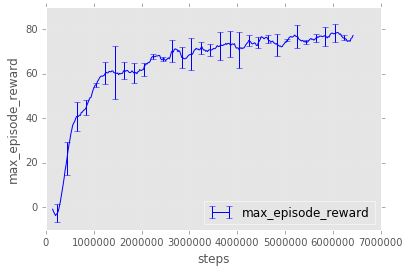

run_1.csv
run_2.csv
run_3.csv
run_4.csv
run_5.csv


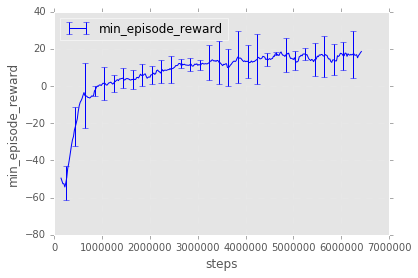

run_1.csv
run_2.csv
run_3.csv
run_4.csv
run_5.csv


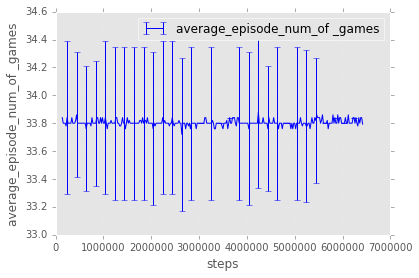

run_1.csv
run_2.csv
run_3.csv
run_4.csv
run_5.csv


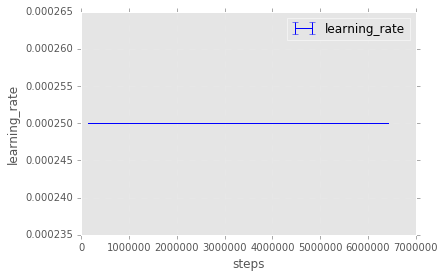

In [48]:
plot("/Users/yannickmerckx/Desktop/results/Boxing/Vanilla/average_q",True)
plot("/Users/yannickmerckx/Desktop/results/Boxing/Vanilla/average_reward",True)
plot("/Users/yannickmerckx/Desktop/results/Boxing/Vanilla/avg_episode_reward",True)
plot("/Users/yannickmerckx/Desktop/results/Boxing/Vanilla/max_episode_reward",True)
plot("/Users/yannickmerckx/Desktop/results/Boxing/Vanilla/min_episode_reward",True)
plot("/Users/yannickmerckx/Desktop/results/Boxing/Vanilla/average_episode_num_of _games",True)
plot("/Users/yannickmerckx/Desktop/results/Boxing/Vanilla/learning_rate",True)

run_1.csv
run_2.csv
run_3.csv
run_4.csv
run_5.csv


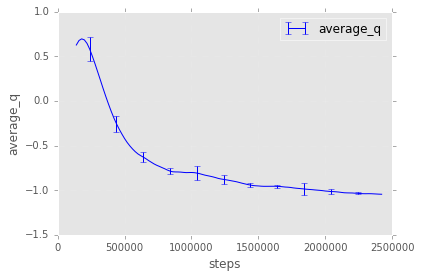

run_1.csv
run_2.csv
run_3.csv
run_4.csv
run_5.csv


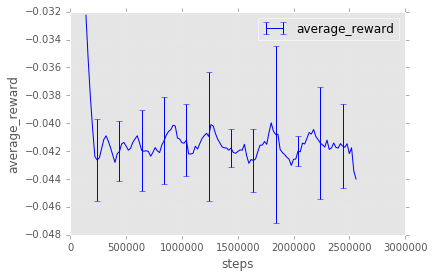

run_1.csv
run_2.csv
run_3.csv
run_4.csv
run_5.csv


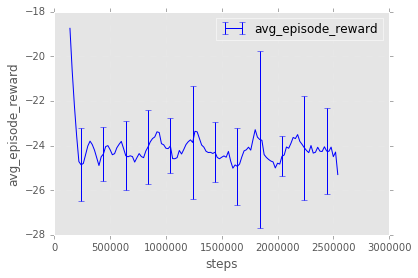

run_1.csv
run_2.csv
run_3.csv
run_4.csv
run_5.csv


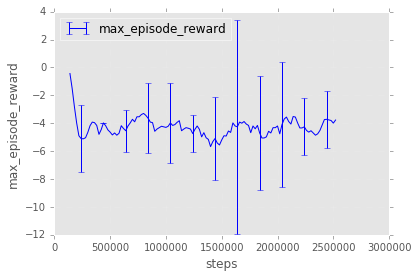

run_1.csv
run_2.csv
run_3.csv
run_4.csv
run_5.csv


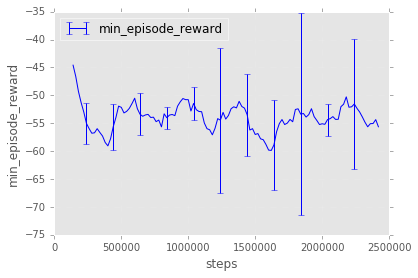

run_1.csv
run_2.csv
run_3.csv
run_4.csv
run_5.csv


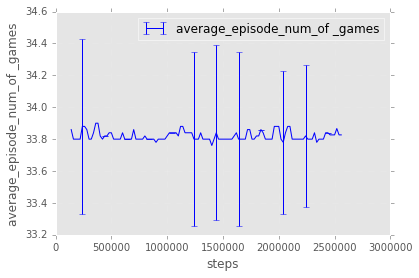

run_1.csv
run_2.csv
run_3.csv
run_4.csv
run_5.csv


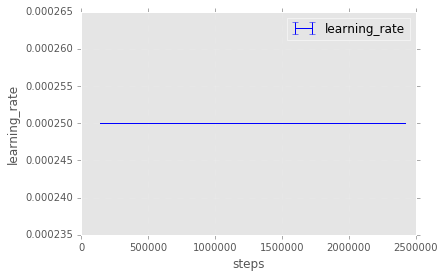

In [49]:
plot("/Users/yannickmerckx/Desktop/results/Boxing/Prior_exp/average_q",True)
plot("/Users/yannickmerckx/Desktop/results/Boxing/Prior_exp/average_reward",True)
plot("/Users/yannickmerckx/Desktop/results/Boxing/Prior_exp/avg_episode_reward",True)
plot("/Users/yannickmerckx/Desktop/results/Boxing/Prior_exp/max_episode_reward",True)
plot("/Users/yannickmerckx/Desktop/results/Boxing/Prior_exp/min_episode_reward",True)
plot("/Users/yannickmerckx/Desktop/results/Boxing/Prior_exp/average_episode_num_of _games",True)
plot("/Users/yannickmerckx/Desktop/results/Boxing/Prior_exp/learning_rate",True)

run_0.csv
run_1.csv
run_2.csv
run_3.csv
run_4.csv


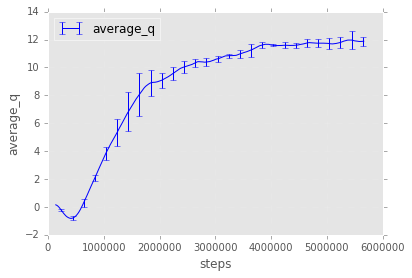

run_1.csv
run_2.csv
run_3.csv
run_4.csv
run_5.csv


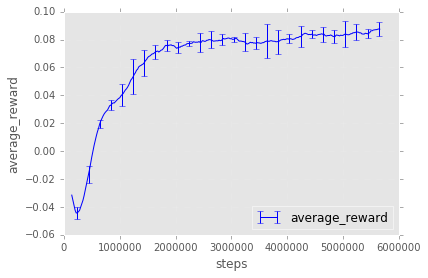

run_0.csv
run_1.csv
run_2.csv
run_3.csv
run_4.csv


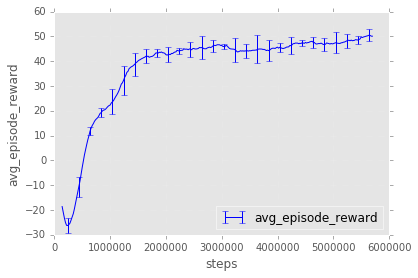

run_0.csv
run_1.csv
run_2.csv
run_3.csv
run_4.csv


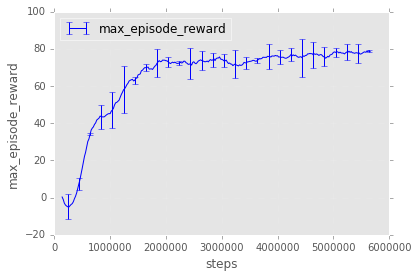

run_1.csv
run_2.csv
run_3.csv
run_4.csv
run_5.csv


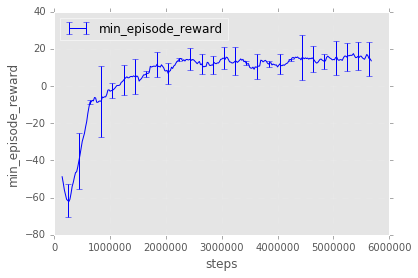

run_0.csv
run_1.csv
run_2.csv
run_3.csv
run_4.csv


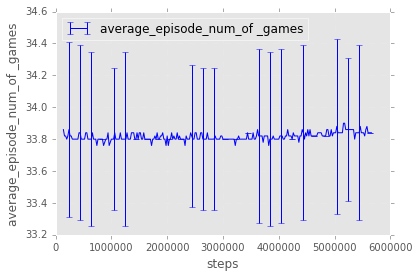

run_0.csv
run_1.csv
run_2.csv
run_3.csv
run_4.csv


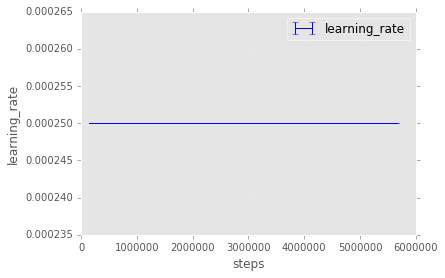

In [50]:
plot("/Users/yannickmerckx/Desktop/results/Boxing/DoubleQ/average_q",True)
plot("/Users/yannickmerckx/Desktop/results/Boxing/DoubleQ/average_reward",True)
plot("/Users/yannickmerckx/Desktop/results/Boxing/DoubleQ/avg_episode_reward",True)
plot("/Users/yannickmerckx/Desktop/results/Boxing/DoubleQ/max_episode_reward",True)
plot("/Users/yannickmerckx/Desktop/results/Boxing/DoubleQ/min_episode_reward",True)
plot("/Users/yannickmerckx/Desktop/results/Boxing/DoubleQ/average_episode_num_of _games",True)
plot("/Users/yannickmerckx/Desktop/results/Boxing/DoubleQ/learning_rate",True)

run_0.csv
run_1.csv
run_2.csv
run_3.csv
run_4.csv
run_5.csv


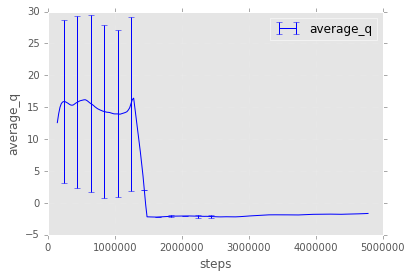

run_0.csv
run_1.csv
run_2.csv
run_3.csv
run_4.csv
run_5.csv


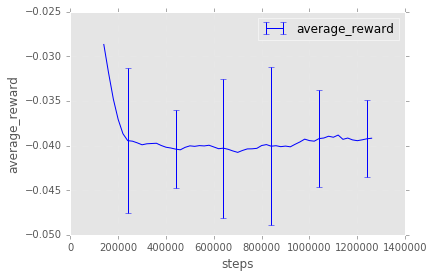

run_0.csv
run_1.csv
run_2.csv
run_3.csv
run_4.csv
run_5.csv


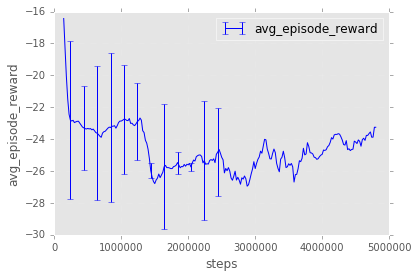

run_0.csv
run_1.csv
run_2.csv
run_3.csv
run_4.csv
run_5.csv


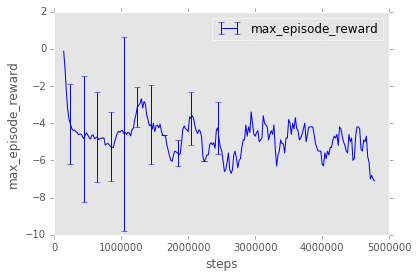

run_0.csv
run_1.csv
run_2.csv
run_3.csv
run_4.csv
run_5.csv


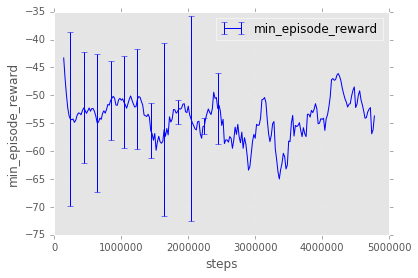

run_0.csv
run_1.csv
run_2.csv
run_3.csv
run_4.csv
run_5.csv


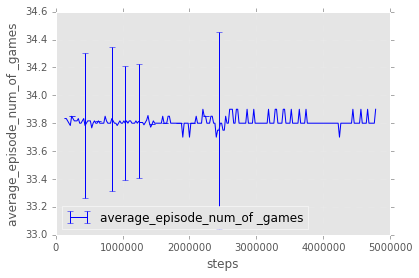

run_0.csv
run_1.csv
run_2.csv
run_3.csv
run_4.csv
run_5.csv


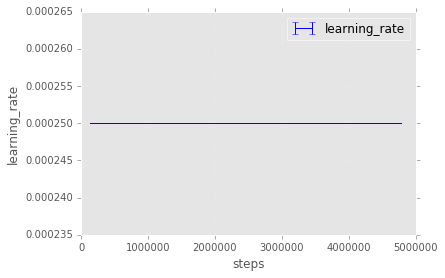

In [51]:
plot("/Users/yannickmerckx/Desktop/results/Boxing/Combo/average_q",True)
plot("/Users/yannickmerckx/Desktop/results/Boxing/Combo/average_reward",True)
plot("/Users/yannickmerckx/Desktop/results/Boxing/Combo/avg_episode_reward",True)
plot("/Users/yannickmerckx/Desktop/results/Boxing/Combo/max_episode_reward",True)
plot("/Users/yannickmerckx/Desktop/results/Boxing/Combo/min_episode_reward",True)
plot("/Users/yannickmerckx/Desktop/results/Boxing/Combo/average_episode_num_of _games",True)
plot("/Users/yannickmerckx/Desktop/results/Boxing/Combo/learning_rate",True)

# KRULL

run_1.csv
run_2.csv
run_3.csv
run_4.csv
run_5.csv


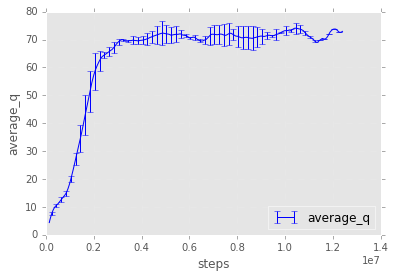

run_1.csv
run_2.csv
run_3.csv
run_4.csv
run_5.csv


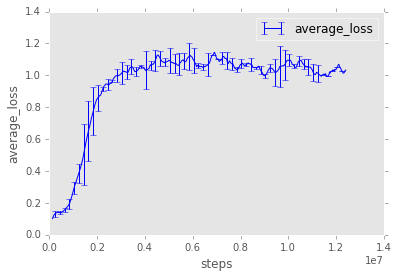

run_1.csv
run_2.csv
run_3.csv
run_4.csv
run_5.csv


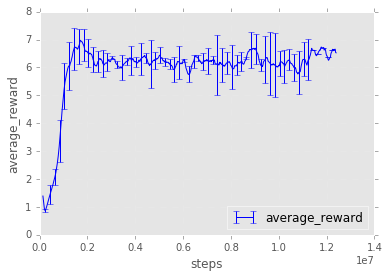

run_1.csv
run_2.csv
run_3.csv
run_4.csv
run_5.csv


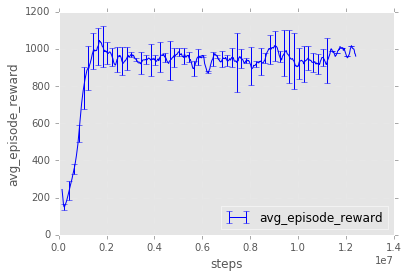

run_1.csv
run_2.csv
run_3.csv
run_4.csv
run_5.csv


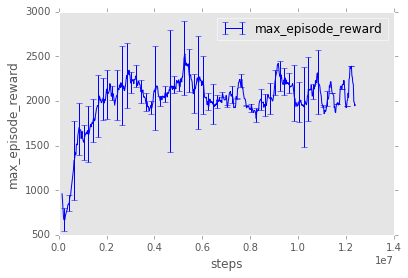

run_1.csv
run_2.csv
run_3.csv
run_4.csv
run_5.csv


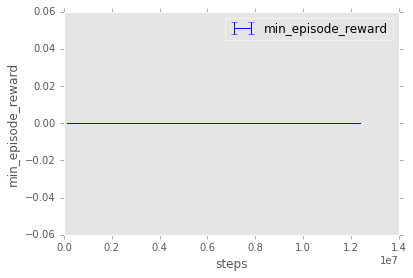

run_1.csv
run_2.csv
run_3.csv
run_4.csv
run_5.csv


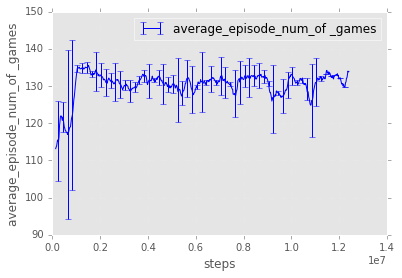

run_1.csv
run_2.csv
run_3.csv
run_4.csv
run_5.csv


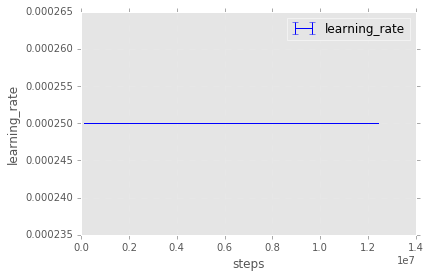

In [134]:
def plot_metrics(gamefolder):
    metrics = ['average_q','average_loss','average_reward','avg_episode_reward','max_episode_reward','min_episode_reward','average_episode_num_of _games','learning_rate']
    for i in metrics:
        inputfolder = os.path.join(gamefolder,i)
        plot(inputfolder,True)

        
        
plot_metrics('./Krull/Vanilla')

run_2.csv
run_3.csv
run_4.csv
run_5.csv
run_6.csv
run_7.csv
run_8.csv


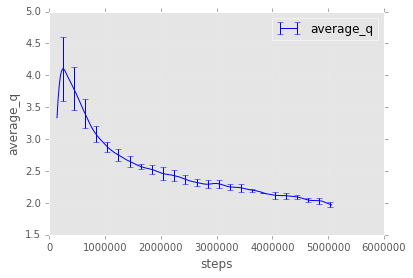

run_1.csv
run_2.csv
run_3.csv
run_4.csv
run_5.csv
run_6.csv
run_7.csv
run_8.csv


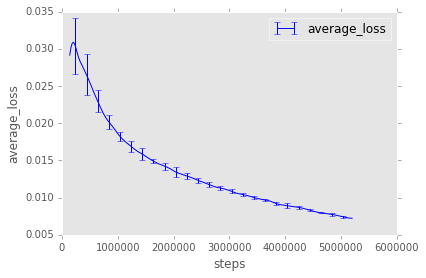

run_1.csv
run_2.csv
run_3.csv
run_4.csv
run_5.csv
run_6.csv
run_7.csv
run_8.csv


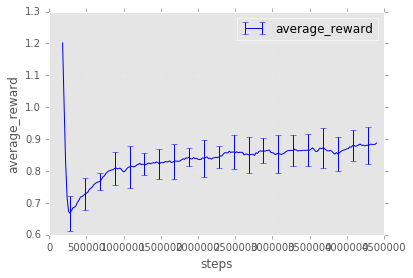

run_1.csv
run_2.csv
run_3.csv
run_4.csv
run_5.csv
run_6.csv
run_7.csv
run_8.csv


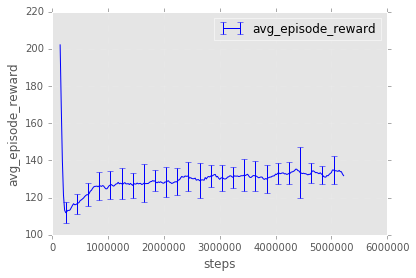

run_1.csv
run_2.csv
run_3.csv
run_4.csv
run_5.csv
run_6.csv
run_7.csv
run_8.csv


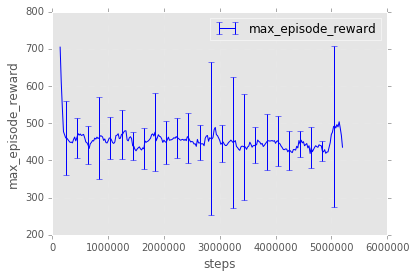

run_1.csv
run_2.csv
run_3.csv
run_4.csv
run_5.csv
run_6.csv
run_7.csv
run_8.csv


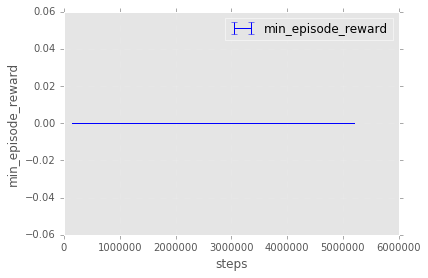

run_1.csv
run_2.csv
run_3.csv
run_4.csv
run_5.csv
run_6.csv
run_7.csv
run_8.csv


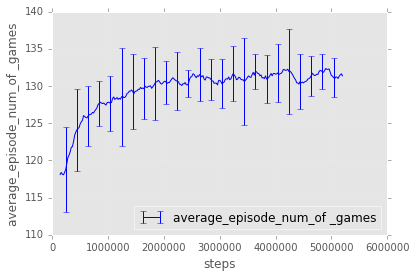

run_1.csv
run_2.csv
run_3.csv
run_4.csv
run_5.csv
run_6.csv
run_7.csv
run_8.csv


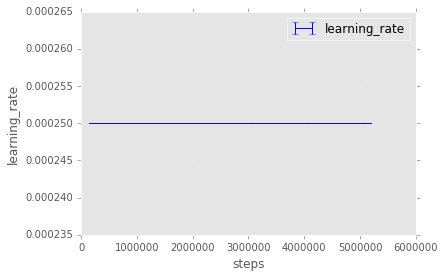

In [135]:
plot_metrics('./Krull/Prior_exp')

run_1.csv
run_2.csv
run_3.csv
run_4.csv
run_5.csv


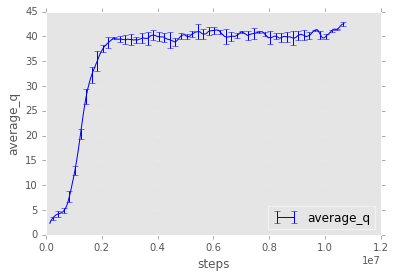

run_1.csv
run_2.csv
run_3.csv
run_4.csv
run_5.csv


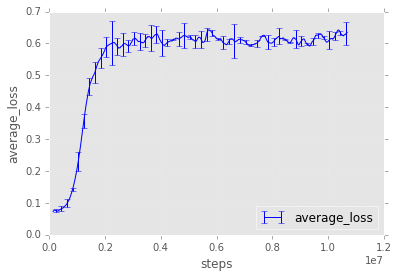

run_1.csv
run_2.csv
run_3.csv
run_4.csv
run_5.csv


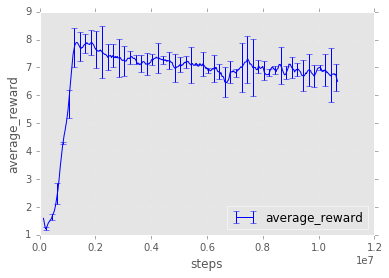

run_1.csv
run_2.csv
run_3.csv
run_4.csv
run_5.csv


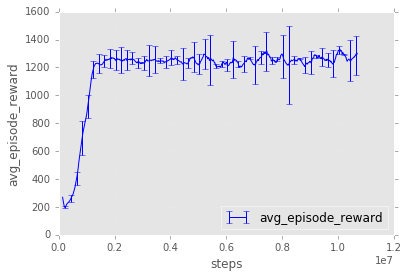

run_1.csv
run_2.csv
run_3.csv
run_4.csv
run_5.csv


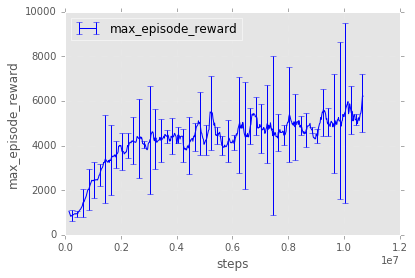

run_1.csv
run_2.csv
run_3.csv
run_4.csv
run_5.csv


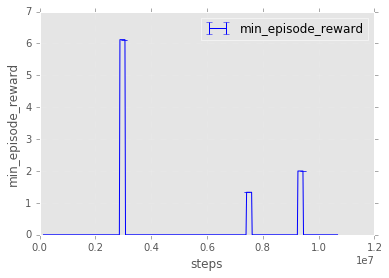

run_1.csv
run_2.csv
run_3.csv
run_4.csv
run_5.csv


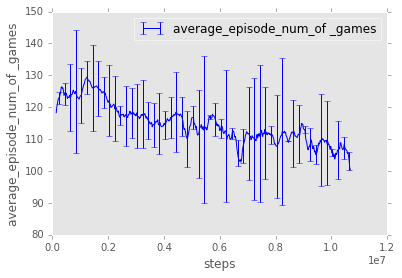

run_1.csv
run_2.csv
run_3.csv
run_4.csv
run_5.csv


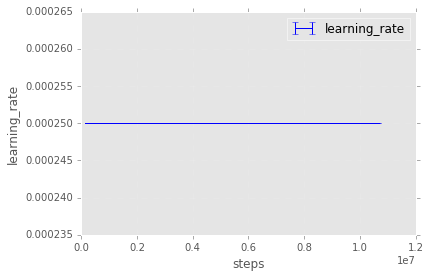

In [136]:
plot_metrics('./Krull/DoubleQ')

run_1.csv
run_2.csv
run_3.csv
run_4.csv
run_5.csv
run_6.csv
run_7.csv


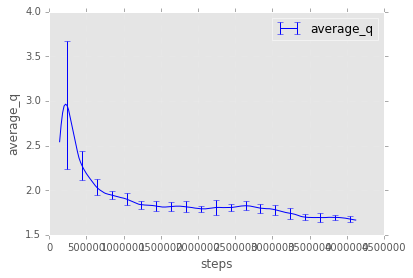

run_1.csv
run_2.csv
run_3.csv
run_4.csv
run_5.csv
run_6.csv
run_7.csv


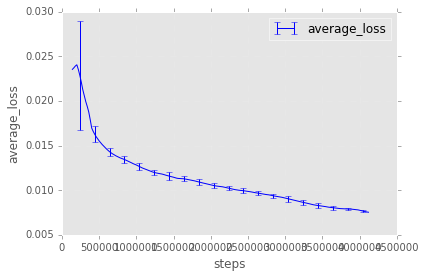

run_1.csv
run_2.csv
run_3.csv
run_4.csv
run_5.csv
run_6.csv
run_7.csv


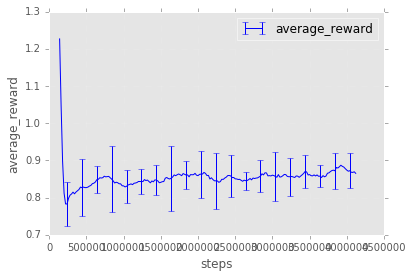

run_1.csv
run_2.csv
run_3.csv
run_4.csv
run_5.csv
run_6.csv
run_7.csv


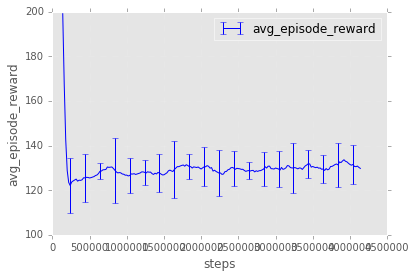

run_1.csv
run_2.csv
run_3.csv
run_4.csv
run_5.csv
run_6.csv
run_7.csv


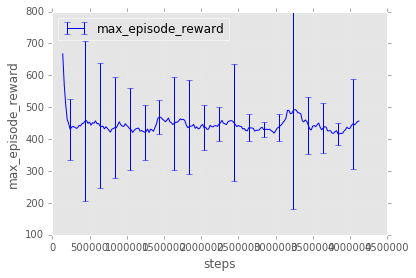

run_1.csv
run_2.csv
run_3.csv
run_4.csv
run_5.csv
run_6.csv
run_7.csv


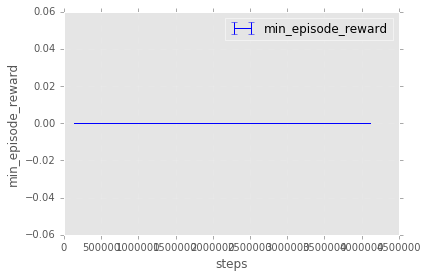

run_1.csv
run_2.csv
run_3.csv
run_4.csv
run_5.csv
run_6.csv
run_7.csv


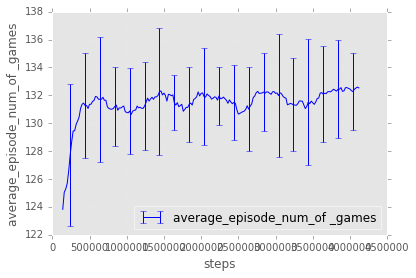

run_1.csv
run_2.csv
run_3.csv
run_4.csv
run_5.csv
run_6.csv
run_7.csv


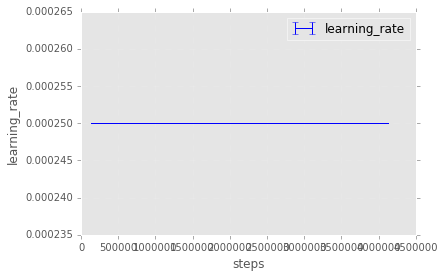

In [137]:
plot_metrics('./Krull/Combo')

# COMPARISONS

In [143]:
def plot_with_baseline(data_dir,data_baseline,outputdir, mean_only=False):
    
    
    
    
    # Get all files in data_dir
    files = [f for f in os.listdir(data_dir) if os.path.isfile(os.path.join(data_dir, f))]
    path = os.path.normpath(data_dir)
    head, val_name = os.path.split(path)
    _, env_name = os.path.split(head)
    
    # Create one big dataframe
    df = pd.DataFrame()
    row_sizes = []
    for i, f in enumerate(files):
        if 'run' in f:
            print(f)
            f_path = os.path.join(data_dir, f)
            data = pd.read_csv(f_path)
            if 'step' not in df.columns:
                df.loc[:, 'step'] = data.loc[:, 'Step']
            colname = 'run' + str(i)
            df.loc[:, colname] = data.loc[:, 'Value']
            run_length = len(data['Value'])
            row_sizes.append(run_length)
        

    # Compute mean and std, ommit 'step' column
    df1 = df.drop(['step'], axis=1)
    df.loc[:, 'mean'] = df1.mean(axis=1)
    df.loc[:, 'std'] = df1.std(axis=1)
    
    #GET DATA BASELINE

        # Get all files in data_dir
    files = [f for f in os.listdir(data_baseline) if os.path.isfile(os.path.join(data_baseline, f))]
    path = os.path.normpath(data_baseline)
    head, val_name_baseline = os.path.split(path)
    _, env_name_baseline = os.path.split(head)

    # Create one big dataframe
    df_baseline = pd.DataFrame()
    row_sizes = []
    for i, f in enumerate(files):
        if 'run' in f:
            print(f)
        
            f_path = os.path.join(data_baseline, f)
            data = pd.read_csv(f_path)
            if 'step' not in df_baseline.columns:
                df_baseline.loc[:, 'step'] = data.loc[:, 'Step']
            colname = 'run' + str(i)
            df_baseline.loc[:, colname] = data.loc[:, 'Value']
            run_length = len(data['Value'])
            row_sizes.append(run_length)
        

    # Compute mean and std, ommit 'step' column
    df1 = df_baseline.drop(['step'], axis=1)
    df_baseline.loc[:, 'mean'] = df1.mean(axis=1)
    df_baseline.loc[:, 'std'] = df1.std(axis=1)
    
 
    # Create the plot
    fig, ax = plt.subplots()
    for column in df:
        if 'run' in column:
            col_data = np.array(df.loc[:, column])
            if not mean_only:
                ax.plot(df.loc[:, 'step'], col_data, 'b--', alpha=0.3, label=None)
    
    rolling_mean = df.loc[:, 'mean'].rolling(window=10, center=True).mean()
    ax.errorbar(df.loc[:, 'step'], rolling_mean, yerr=df.loc[:, 'std'], fmt='b', errorevery=10, label=env_name)
    
    for column in df_baseline:
        if 'run' in column:
            col_data = np.array(df_baseline.loc[:, column])
           
    
    rolling_mean = df_baseline.loc[:, 'mean'].rolling(window=10, center=True).mean()
    ax.errorbar(df_baseline.loc[:, 'step'], rolling_mean, yerr=df_baseline.loc[:, 'std'], fmt='r', errorevery=10, label=env_name_baseline)
    
   
    
    ax.legend(loc='best')
    ax.set_xlabel('steps')
    ax.set_ylabel(val_name)
    # ax.set_title('Average score per episode')
    ax.grid(linestyle='--', linewidth=1, alpha=0.1)
    plt.show()
    fig.savefig(os.path.join(outputdir,env_name + '-' +'baseline' + '-'+ val_name + '.pdf'))
    
    
    
def plot_metrics_baseline(gamefolder,comparison):
    metrics = ['average_loss','average_q','average_reward','avg_episode_reward','max_episode_reward','min_episode_reward','average_episode_num_of _games','learning_rate']
    for i in metrics:
        inputfolder = os.path.join(gamefolder,i)
        path = os.path.normpath(gamefolder)
        head, val_name_baseline = os.path.split(path)
        baseline_folder = os.path.join("./",head,'Vanilla',i)
        output = os.path.join(head,'Comparisons',comparison)
        print(inputfolder,baseline_folder,output)
        plot_with_baseline(inputfolder,baseline_folder,output,True)


./Krull/DoubleQ/average_loss ./Krull/Vanilla/average_loss Krull/Comparisons/DoubleQ
run_1.csv
run_2.csv
run_3.csv
run_4.csv
run_5.csv
run_1.csv
run_2.csv
run_3.csv
run_4.csv
run_5.csv


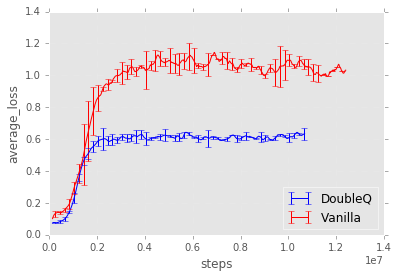

./Krull/DoubleQ/average_q ./Krull/Vanilla/average_q Krull/Comparisons/DoubleQ
run_1.csv
run_2.csv
run_3.csv
run_4.csv
run_5.csv
run_1.csv
run_2.csv
run_3.csv
run_4.csv
run_5.csv


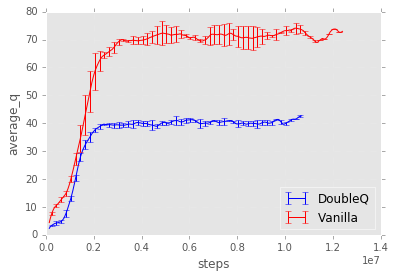

./Krull/DoubleQ/average_reward ./Krull/Vanilla/average_reward Krull/Comparisons/DoubleQ
run_1.csv
run_2.csv
run_3.csv
run_4.csv
run_5.csv
run_1.csv
run_2.csv
run_3.csv
run_4.csv
run_5.csv


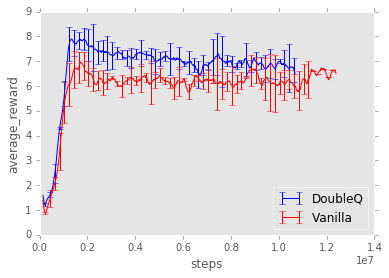

./Krull/DoubleQ/avg_episode_reward ./Krull/Vanilla/avg_episode_reward Krull/Comparisons/DoubleQ
run_1.csv
run_2.csv
run_3.csv
run_4.csv
run_5.csv
run_1.csv
run_2.csv
run_3.csv
run_4.csv
run_5.csv


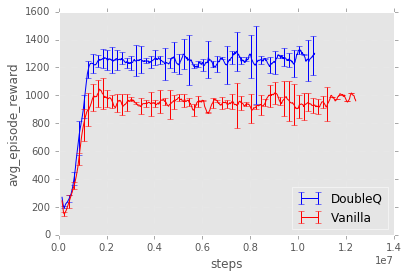

./Krull/DoubleQ/max_episode_reward ./Krull/Vanilla/max_episode_reward Krull/Comparisons/DoubleQ
run_1.csv
run_2.csv
run_3.csv
run_4.csv
run_5.csv
run_1.csv
run_2.csv
run_3.csv
run_4.csv
run_5.csv


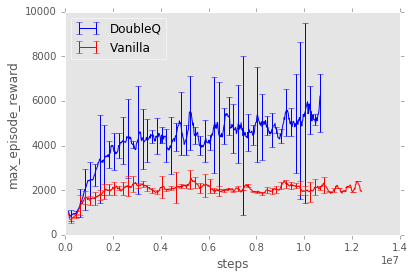

./Krull/DoubleQ/min_episode_reward ./Krull/Vanilla/min_episode_reward Krull/Comparisons/DoubleQ
run_1.csv
run_2.csv
run_3.csv
run_4.csv
run_5.csv
run_1.csv
run_2.csv
run_3.csv
run_4.csv
run_5.csv


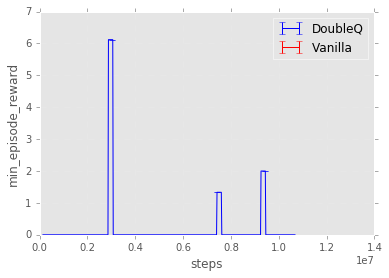

./Krull/DoubleQ/average_episode_num_of _games ./Krull/Vanilla/average_episode_num_of _games Krull/Comparisons/DoubleQ
run_1.csv
run_2.csv
run_3.csv
run_4.csv
run_5.csv
run_1.csv
run_2.csv
run_3.csv
run_4.csv
run_5.csv


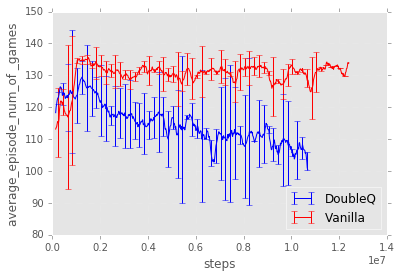

./Krull/DoubleQ/learning_rate ./Krull/Vanilla/learning_rate Krull/Comparisons/DoubleQ
run_1.csv
run_2.csv
run_3.csv
run_4.csv
run_5.csv
run_1.csv
run_2.csv
run_3.csv
run_4.csv
run_5.csv


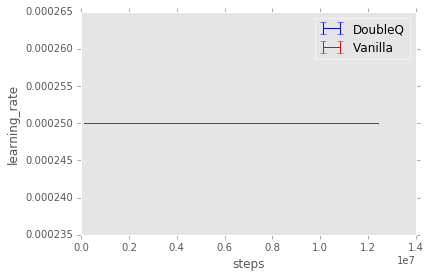

In [144]:
outputpath = "./Krull/DoubleQ/"
plot_metrics_baseline(outputpath,"DoubleQ")


./Boxing/DoubleQ/average_loss ./Boxing/Vanilla/average_loss Boxing/Comparisons/DoubleQ
run_0.csv
run_1.csv
run_2.csv
run_3.csv
run_5.csv
run_1.csv
run_2.csv
run_3.csv
run_4.csv
run_5.csv


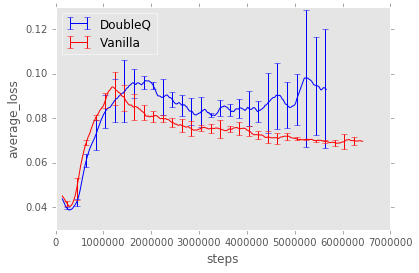

./Boxing/DoubleQ/average_q ./Boxing/Vanilla/average_q Boxing/Comparisons/DoubleQ
run_0.csv
run_1.csv
run_2.csv
run_3.csv
run_4.csv
run_1.csv
run_2.csv
run_3.csv
run_4.csv
run_5.csv


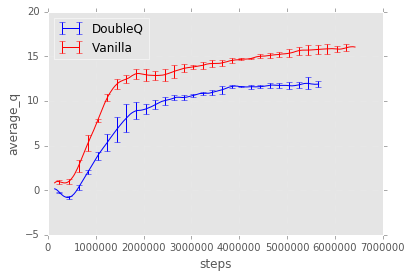

./Boxing/DoubleQ/average_reward ./Boxing/Vanilla/average_reward Boxing/Comparisons/DoubleQ
run_1.csv
run_2.csv
run_3.csv
run_4.csv
run_5.csv
run_1.csv
run_2.csv
run_3.csv
run_4.csv
run_5.csv


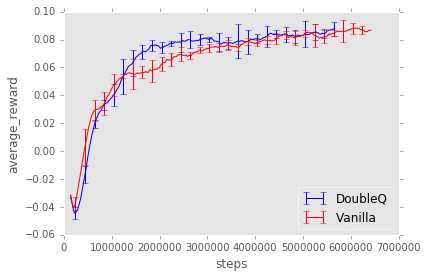

./Boxing/DoubleQ/avg_episode_reward ./Boxing/Vanilla/avg_episode_reward Boxing/Comparisons/DoubleQ
run_0.csv
run_1.csv
run_2.csv
run_3.csv
run_4.csv
run_1.csv
run_2.csv
run_3.csv
run_4.csv
run_5.csv


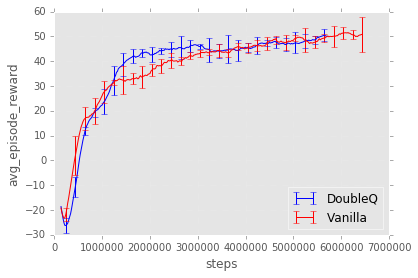

./Boxing/DoubleQ/max_episode_reward ./Boxing/Vanilla/max_episode_reward Boxing/Comparisons/DoubleQ
run_0.csv
run_1.csv
run_2.csv
run_3.csv
run_4.csv
run_1.csv
run_2.csv
run_3.csv
run_4.csv
run_5.csv


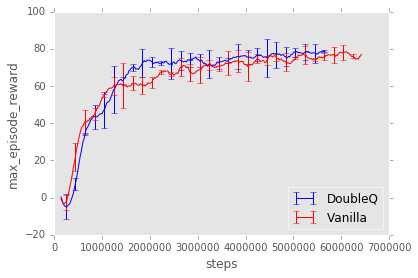

./Boxing/DoubleQ/min_episode_reward ./Boxing/Vanilla/min_episode_reward Boxing/Comparisons/DoubleQ
run_1.csv
run_2.csv
run_3.csv
run_4.csv
run_5.csv
run_1.csv
run_2.csv
run_3.csv
run_4.csv
run_5.csv


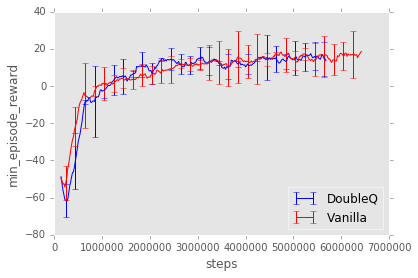

./Boxing/DoubleQ/average_episode_num_of _games ./Boxing/Vanilla/average_episode_num_of _games Boxing/Comparisons/DoubleQ
run_0.csv
run_1.csv
run_2.csv
run_3.csv
run_4.csv
run_1.csv
run_2.csv
run_3.csv
run_4.csv
run_5.csv


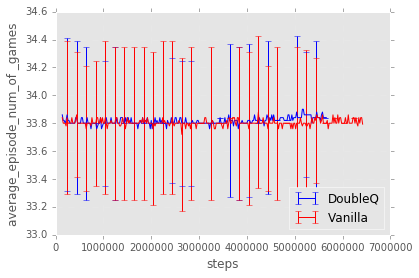

./Boxing/DoubleQ/learning_rate ./Boxing/Vanilla/learning_rate Boxing/Comparisons/DoubleQ
run_0.csv
run_1.csv
run_2.csv
run_3.csv
run_4.csv
run_1.csv
run_2.csv
run_3.csv
run_4.csv
run_5.csv


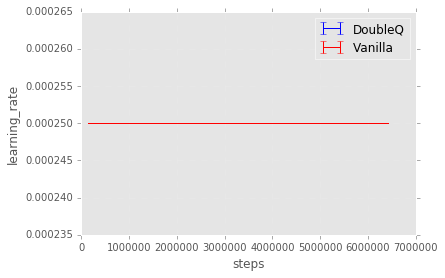

In [145]:
outputpath = "./Boxing/DoubleQ/"
plot_metrics_baseline(outputpath,"DoubleQ")

./Boxing/Prior_exp/average_q ./Boxing/Vanilla/average_q Boxing/Comparisons/Prior_exp
run_1.csv
run_2.csv
run_3.csv
run_4.csv
run_5.csv
run_1.csv
run_2.csv
run_3.csv
run_4.csv
run_5.csv


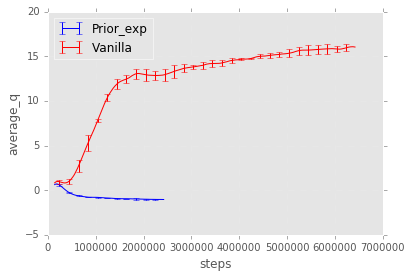

./Boxing/Prior_exp/average_reward ./Boxing/Vanilla/average_reward Boxing/Comparisons/Prior_exp
run_1.csv
run_2.csv
run_3.csv
run_4.csv
run_5.csv
run_1.csv
run_2.csv
run_3.csv
run_4.csv
run_5.csv


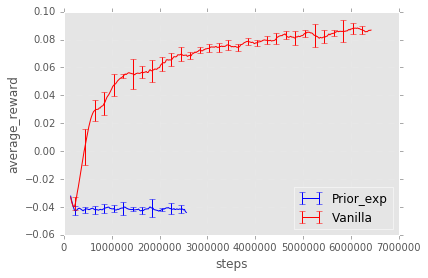

./Boxing/Prior_exp/avg_episode_reward ./Boxing/Vanilla/avg_episode_reward Boxing/Comparisons/Prior_exp
run_1.csv
run_2.csv
run_3.csv
run_4.csv
run_5.csv
run_1.csv
run_2.csv
run_3.csv
run_4.csv
run_5.csv


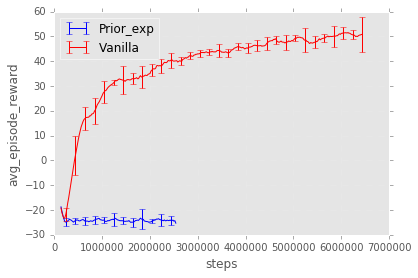

./Boxing/Prior_exp/max_episode_reward ./Boxing/Vanilla/max_episode_reward Boxing/Comparisons/Prior_exp
run_1.csv
run_2.csv
run_3.csv
run_4.csv
run_5.csv
run_1.csv
run_2.csv
run_3.csv
run_4.csv
run_5.csv


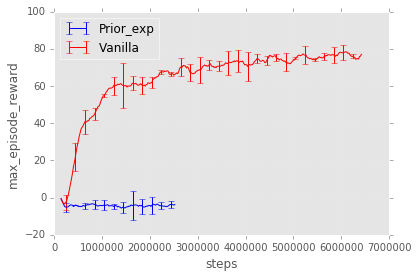

./Boxing/Prior_exp/min_episode_reward ./Boxing/Vanilla/min_episode_reward Boxing/Comparisons/Prior_exp
run_1.csv
run_2.csv
run_3.csv
run_4.csv
run_5.csv
run_1.csv
run_2.csv
run_3.csv
run_4.csv
run_5.csv


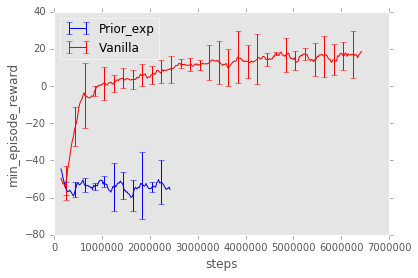

./Boxing/Prior_exp/average_episode_num_of _games ./Boxing/Vanilla/average_episode_num_of _games Boxing/Comparisons/Prior_exp
run_1.csv
run_2.csv
run_3.csv
run_4.csv
run_5.csv
run_1.csv
run_2.csv
run_3.csv
run_4.csv
run_5.csv


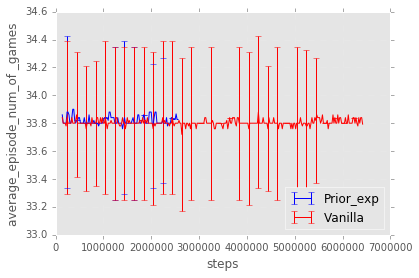

./Boxing/Prior_exp/learning_rate ./Boxing/Vanilla/learning_rate Boxing/Comparisons/Prior_exp
run_1.csv
run_2.csv
run_3.csv
run_4.csv
run_5.csv
run_1.csv
run_2.csv
run_3.csv
run_4.csv
run_5.csv


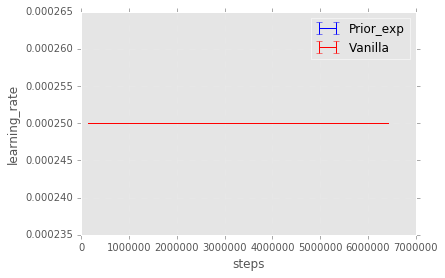

In [141]:
outputpath = "./Boxing/Prior_exp/"
plot_metrics_baseline(outputpath,"Prior_exp")

./Krull/Prior_exp/average_q ./Krull/Vanilla/average_q Krull/Comparisons/Prior_exp
run_2.csv
run_3.csv
run_4.csv
run_5.csv
run_6.csv
run_7.csv
run_8.csv
run_1.csv
run_2.csv
run_3.csv
run_4.csv
run_5.csv


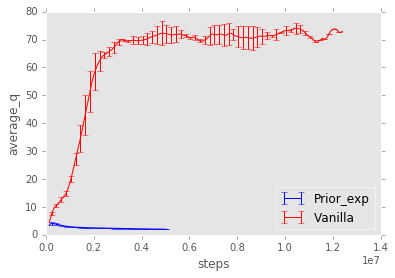

./Krull/Prior_exp/average_reward ./Krull/Vanilla/average_reward Krull/Comparisons/Prior_exp
run_1.csv
run_2.csv
run_3.csv
run_4.csv
run_5.csv
run_6.csv
run_7.csv
run_8.csv
run_1.csv
run_2.csv
run_3.csv
run_4.csv
run_5.csv


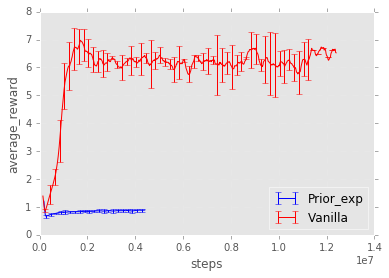

./Krull/Prior_exp/avg_episode_reward ./Krull/Vanilla/avg_episode_reward Krull/Comparisons/Prior_exp
run_1.csv
run_2.csv
run_3.csv
run_4.csv
run_5.csv
run_6.csv
run_7.csv
run_8.csv
run_1.csv
run_2.csv
run_3.csv
run_4.csv
run_5.csv


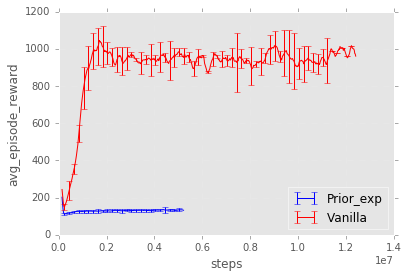

./Krull/Prior_exp/max_episode_reward ./Krull/Vanilla/max_episode_reward Krull/Comparisons/Prior_exp
run_1.csv
run_2.csv
run_3.csv
run_4.csv
run_5.csv
run_6.csv
run_7.csv
run_8.csv
run_1.csv
run_2.csv
run_3.csv
run_4.csv
run_5.csv


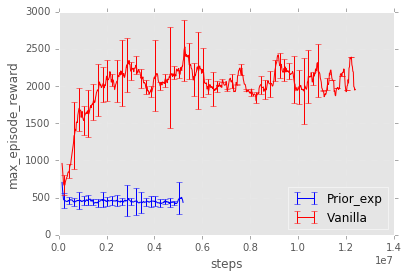

./Krull/Prior_exp/min_episode_reward ./Krull/Vanilla/min_episode_reward Krull/Comparisons/Prior_exp
run_1.csv
run_2.csv
run_3.csv
run_4.csv
run_5.csv
run_6.csv
run_7.csv
run_8.csv
run_1.csv
run_2.csv
run_3.csv
run_4.csv
run_5.csv


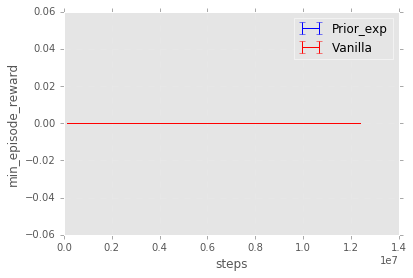

./Krull/Prior_exp/average_episode_num_of _games ./Krull/Vanilla/average_episode_num_of _games Krull/Comparisons/Prior_exp
run_1.csv
run_2.csv
run_3.csv
run_4.csv
run_5.csv
run_6.csv
run_7.csv
run_8.csv
run_1.csv
run_2.csv
run_3.csv
run_4.csv
run_5.csv


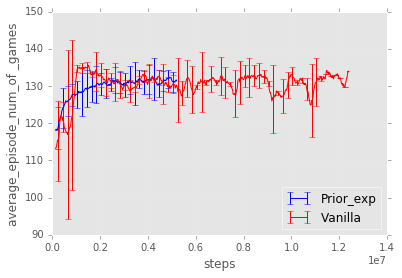

./Krull/Prior_exp/learning_rate ./Krull/Vanilla/learning_rate Krull/Comparisons/Prior_exp
run_1.csv
run_2.csv
run_3.csv
run_4.csv
run_5.csv
run_6.csv
run_7.csv
run_8.csv
run_1.csv
run_2.csv
run_3.csv
run_4.csv
run_5.csv


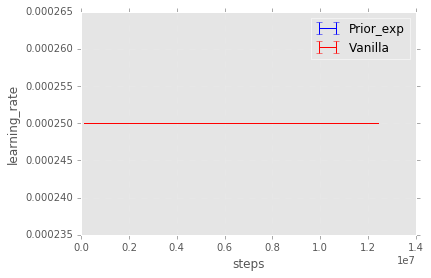

In [142]:
outputpath = "./Krull/Prior_exp/"
plot_metrics_baseline(outputpath,"Prior_exp")

# FULL COMPARISION

./Boxing/Combo/average_loss ./Boxing/Vanilla/average_loss Boxing/Comparisons/Combo
run_0.csv
run_1.csv
run_2.csv
run_3.csv
run_4.csv
run_5.csv
run_1.csv
run_2.csv
run_3.csv
run_4.csv
run_5.csv


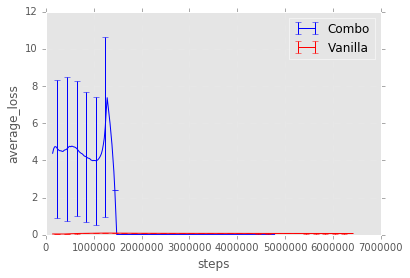

./Boxing/Combo/average_q ./Boxing/Vanilla/average_q Boxing/Comparisons/Combo
run_0.csv
run_1.csv
run_2.csv
run_3.csv
run_4.csv
run_5.csv
run_1.csv
run_2.csv
run_3.csv
run_4.csv
run_5.csv


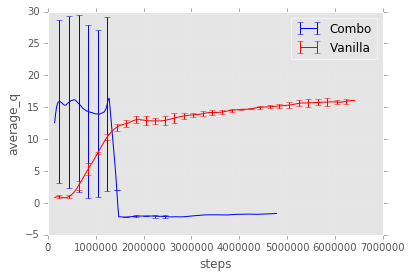

./Boxing/Combo/average_reward ./Boxing/Vanilla/average_reward Boxing/Comparisons/Combo
run_0.csv
run_1.csv
run_2.csv
run_3.csv
run_4.csv
run_5.csv
run_1.csv
run_2.csv
run_3.csv
run_4.csv
run_5.csv


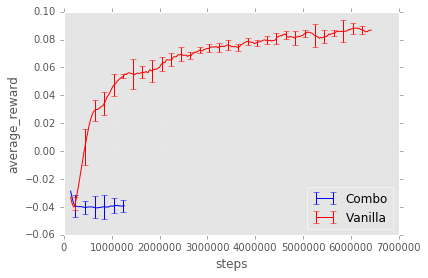

./Boxing/Combo/avg_episode_reward ./Boxing/Vanilla/avg_episode_reward Boxing/Comparisons/Combo
run_0.csv
run_1.csv
run_2.csv
run_3.csv
run_4.csv
run_5.csv
run_1.csv
run_2.csv
run_3.csv
run_4.csv
run_5.csv


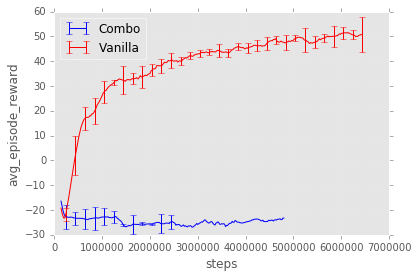

./Boxing/Combo/max_episode_reward ./Boxing/Vanilla/max_episode_reward Boxing/Comparisons/Combo
run_0.csv
run_1.csv
run_2.csv
run_3.csv
run_4.csv
run_5.csv
run_1.csv
run_2.csv
run_3.csv
run_4.csv
run_5.csv


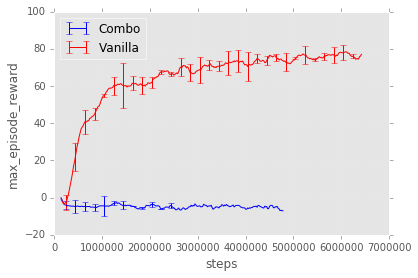

./Boxing/Combo/min_episode_reward ./Boxing/Vanilla/min_episode_reward Boxing/Comparisons/Combo
run_0.csv
run_1.csv
run_2.csv
run_3.csv
run_4.csv
run_5.csv
run_1.csv
run_2.csv
run_3.csv
run_4.csv
run_5.csv


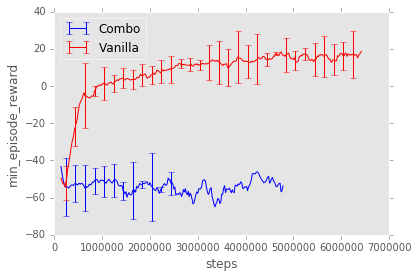

./Boxing/Combo/average_episode_num_of _games ./Boxing/Vanilla/average_episode_num_of _games Boxing/Comparisons/Combo
run_0.csv
run_1.csv
run_2.csv
run_3.csv
run_4.csv
run_5.csv
run_1.csv
run_2.csv
run_3.csv
run_4.csv
run_5.csv


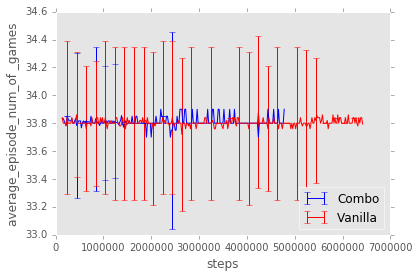

./Boxing/Combo/learning_rate ./Boxing/Vanilla/learning_rate Boxing/Comparisons/Combo
run_0.csv
run_1.csv
run_2.csv
run_3.csv
run_4.csv
run_5.csv
run_1.csv
run_2.csv
run_3.csv
run_4.csv
run_5.csv


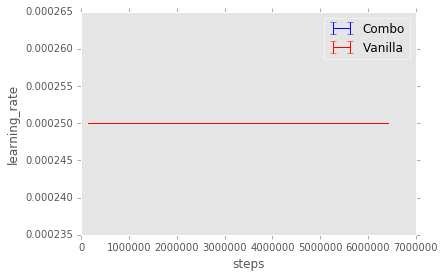

In [146]:
outputpath = "./Boxing/Combo/"
plot_metrics_baseline(outputpath,"Combo")

./Krull/Combo/average_loss ./Krull/Vanilla/average_loss Krull/Comparisons/Combo
run_1.csv
run_2.csv
run_3.csv
run_4.csv
run_5.csv
run_6.csv
run_7.csv
run_1.csv
run_2.csv
run_3.csv
run_4.csv
run_5.csv


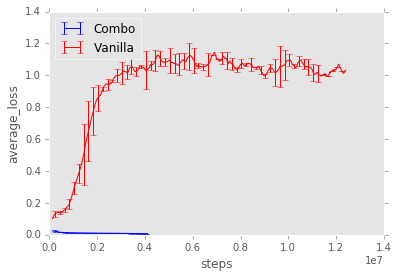

./Krull/Combo/average_q ./Krull/Vanilla/average_q Krull/Comparisons/Combo
run_1.csv
run_2.csv
run_3.csv
run_4.csv
run_5.csv
run_6.csv
run_7.csv
run_1.csv
run_2.csv
run_3.csv
run_4.csv
run_5.csv


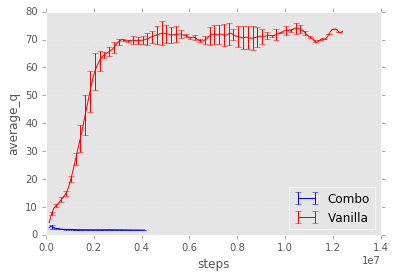

./Krull/Combo/average_reward ./Krull/Vanilla/average_reward Krull/Comparisons/Combo
run_1.csv
run_2.csv
run_3.csv
run_4.csv
run_5.csv
run_6.csv
run_7.csv
run_1.csv
run_2.csv
run_3.csv
run_4.csv
run_5.csv


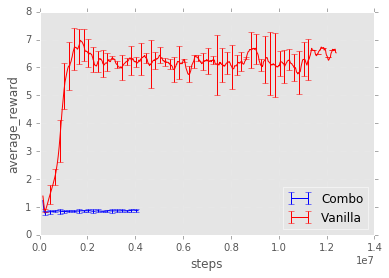

./Krull/Combo/avg_episode_reward ./Krull/Vanilla/avg_episode_reward Krull/Comparisons/Combo
run_1.csv
run_2.csv
run_3.csv
run_4.csv
run_5.csv
run_6.csv
run_7.csv
run_1.csv
run_2.csv
run_3.csv
run_4.csv
run_5.csv


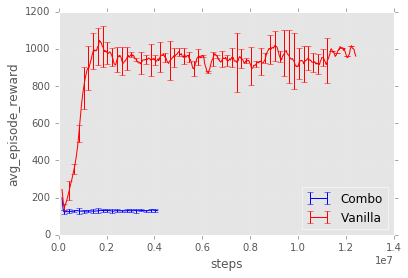

./Krull/Combo/max_episode_reward ./Krull/Vanilla/max_episode_reward Krull/Comparisons/Combo
run_1.csv
run_2.csv
run_3.csv
run_4.csv
run_5.csv
run_6.csv
run_7.csv
run_1.csv
run_2.csv
run_3.csv
run_4.csv
run_5.csv


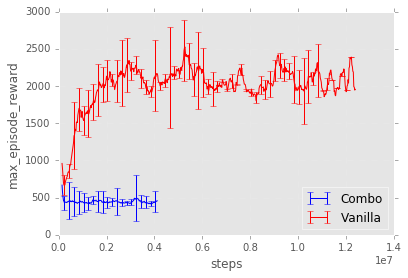

./Krull/Combo/min_episode_reward ./Krull/Vanilla/min_episode_reward Krull/Comparisons/Combo
run_1.csv
run_2.csv
run_3.csv
run_4.csv
run_5.csv
run_6.csv
run_7.csv
run_1.csv
run_2.csv
run_3.csv
run_4.csv
run_5.csv


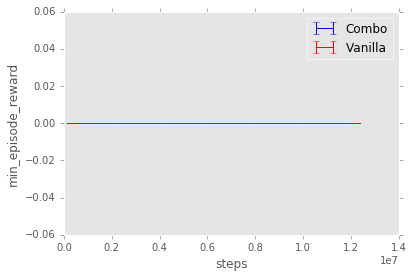

./Krull/Combo/average_episode_num_of _games ./Krull/Vanilla/average_episode_num_of _games Krull/Comparisons/Combo
run_1.csv
run_2.csv
run_3.csv
run_4.csv
run_5.csv
run_6.csv
run_7.csv
run_1.csv
run_2.csv
run_3.csv
run_4.csv
run_5.csv


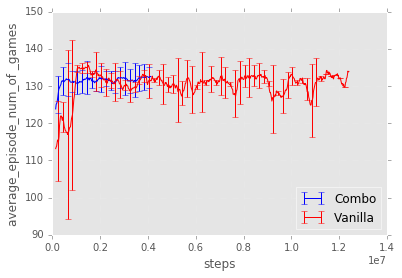

./Krull/Combo/learning_rate ./Krull/Vanilla/learning_rate Krull/Comparisons/Combo
run_1.csv
run_2.csv
run_3.csv
run_4.csv
run_5.csv
run_6.csv
run_7.csv
run_1.csv
run_2.csv
run_3.csv
run_4.csv
run_5.csv


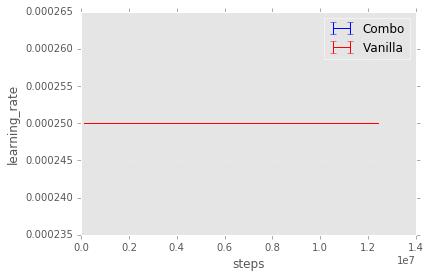

In [149]:
outputpath = "./Krull/Combo/"
plot_metrics_baseline(outputpath,"Combo")